In [1]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
seoul = pd.read_csv('서울_격자_건축인구데이터2.csv', encoding='cp949')

In [10]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x        99 non-null     int64 
 1   y        99 non-null     int64 
 2   gid      99 non-null     object
 3   str_val  99 non-null     int64 
 4   pop_val  99 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [12]:
X = seoul['x']
Y = seoul['y']
demanda = seoul['pop_val']
N=50

In [13]:
# #Nodos:
# N=31

# #Coordenades:
# np.random.seed(1)
# X = list(np.random.random(N)*100)
# Y = list(np.random.random(N)*100)

# #Demanda
# demanda = list(np.random.randint(low=10,high=50,size=N))

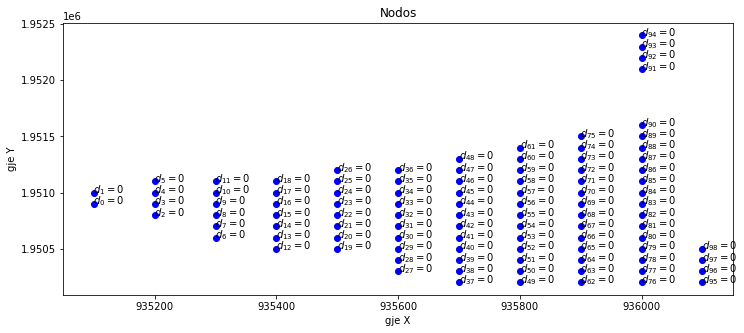

In [14]:
#Graficar:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
  plt.annotate('$d_{%d}=%d$' %(i, demanda[i]), (X[i]-0.5, Y[i]-5))

plt.xlabel('gje X')
plt.ylabel('gje Y')
plt.title('Nodos')
plt.show()

In [15]:
# Set o Conjuntos
nodos = [i for i in range(N)]

ubicaciones = [i for i in nodos]
arcos = [(i,j) for i in nodos for j in ubicaciones]
#Maximo numero de ubicaciones
P=5

#Matrix de Distancia:
distancia = {(i,j): np.hypot (X[i]-X[j], Y[i]-Y[j]) for i in nodos for j in ubicaciones}

In [16]:
#P-median
model = Model('P-Median')

#variable de dicision:
x = model.addVars(arcos,vtype = GRB.BINARY, name = 'x')
y = model.addVars(ubicaciones,vtype = GRB.BINARY, name = 'y')

#function objectivo:
model.setObjective(quicksum(distancia[i,j]*x[i,j] for i,j in arcos),GRB.MINIMIZE)

#Restricciones
model.addConstrs(quicksum(x[i,j] for j in ubicaciones) == 1 for i in nodos)
model.addConstr(quicksum(y[j] for j in ubicaciones) <= P)
model.addConstrs(x[i,j]-y[j] <= 0 for i in nodos for j in ubicaciones)

model.optimize()

Restricted license - for non-production use only - expires 2022-01-13
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [ ]:
#Arcos Activos:
arcos_activos = [ k for k in arcos if x[k].x >0.9]
print(arcos_activos)

In [ ]:
#ubicaciones Activos:
ubicaciones_activos = [ k for k in ubicaciones if y[k].x >0.9]
print(ubicaciones_activos)

In [ ]:
#Graficar la solucion
from colour import Color

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in ubicaciones_activos:
  plt.scatter(X[n],Y[n], color='red',marker='D')

for i in range(len(X)):
  plt.annotate( '$d_{%d}=%d$' %(i,demanda[i]),(X[i]-0.5,Y[i]-5))

# # 얘 넣으면 오류뜸 줄 표현하는거
#  for n in arcos_activos:
#    i=n[0]
#    j=n[1]
#    plt.plot([X[i],X[j]],[Y[i],Y[j]],color=Color(ubicaciones_activos.index(j)))

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Nodos')
plt.show()